In [ ]:
!pip install tensorflow-gpu==2.11.0-rc0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.4 MB 23 kB/s 
     |████████████████████████████████| 438 kB 61.1 MB/s 
     |████████████████████████████████| 5.9 MB 63.7 MB/s 
     |████████████████████████████████| 1.7 MB 64.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
from tensorflow.keras.layers import Input,Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 16.80 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
# Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax")) 
model.summary()

# model = Sequential()

# model.add(Conv2D(16, (3,3), input_shape = (224, 224, 3), activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.2))

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.3))

# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1, activation='sigmoid'))
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
# tell the model what cost and optimization method to use 
# setting up the model for training
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train dataset need to apply more augumentation to create more data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)


In [ ]:
training_set = train_datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (224, 224),
                                                   class_mode = 'categorical',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )



Found 27558 images belonging to 2 classes.


In [ ]:
test_set = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (224, 224),
                                                   class_mode = 'categorical',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-11-6ec5a35725ca>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
1723/1723 [==============================] - 323s 182ms/step - loss: 0.3150 - accuracy: 0.8716 - val_loss: 0.2153 - val_accuracy: 0.9287
Epoch 2/5
1723/1723 [==============================] - 304s 177ms/step - loss: 0.1952 - accuracy: 0.9403 - val_loss: 0.1686 - val_accuracy: 0.9434
Epoch 3/5
1723/1723 [==============================] - 304s 176ms/step - loss: 0.1816 - accuracy: 0.9439 - val_loss: 0.1650 - val_accuracy: 0.9430
Epoch 4/5
1723/1723 [==============================] - 302s 175ms/step - loss: 0.1586 - accuracy: 0.9504 - val_loss: 0.1642 - val_accuracy: 0.9485
Epoch 5/5
1723/1723 [==============================] - 301s 175ms/step - loss: 0.1504 - accuracy: 0.9531 - val_loss: 0.1597 - val_accuracy: 0.9367


In [ ]:
# save it as a h5 file


model.save('epoches5-last.h5')

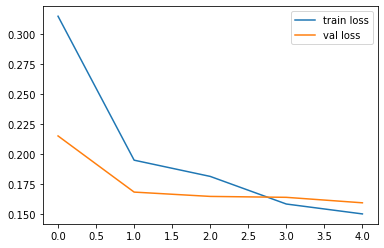

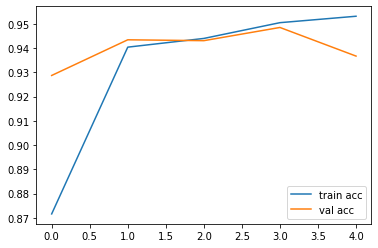

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights means in backword propogation it won't update the weight
for layer in model.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/Malaria-Classification-Using-CNN/malaria-dataset/*')
folders

['/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized',
 '/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected']

In [ ]:
x = Flatten()(model.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)+

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     